# Car Sales Report
This notebook explores a car sales dataset collected from various dealerships across multiple cities in the United States, including Austin, Scottsdale, Pasco, and others. The dataset includes information on customer demographics, vehicle pricing, dealership regions, and transaction dates. The objective of this analysis is to uncover insights such as sales trends over time, pricing patterns by region, and relationships between customer income and car price. This exploration will involve data cleaning, visualization, and basic statistical analysis using Python and popular data science libraries. Note that the dataset has been taken from **Kaggle**.

## Importing Python libraries
The first step is to import python libraries in order to utilize their functionalities.

In [68]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset
It is necessary to import the dataset to the notebook before using it. This dataset has been taken from Kaggle.

In [69]:
df = pd.read_csv("Car Sales.xlsx - car_data.csv")

## Describing the dataset
We will see a brief description of the dataset at hand

In [70]:
df.describe()

,Annual Income,Price ($),Phone
count,2.390600e+04,23906.000000,2.390600e+04
mean,8.308403e+05,28090.247846,7.497741e+06
std,7.200064e+05,14788.687608,8.674920e+05
min,1.008000e+04,1200.000000,6.000101e+06
25%,3.860000e+05,18001.000000,6.746495e+06
50%,7.350000e+05,23000.000000,7.496198e+06
75%,1.175750e+06,34000.000000,8.248146e+06
max,1.120000e+07,85800.000000,8.999579e+06


We can see that we have 23906 rows at hand. We can also see other properties such as the average (mean), standard deviation (std) and different quartiles.

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


## Null Values
We'll see if our dataset has any null values

In [72]:
df.isnull().sum()

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

As there is one null value in customer name, we will single it out. However, since customer name is not of much relevance to us in this case, we can leave it as is.

In [73]:
df[df['Customer Name'].isnull()]

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
7564,C_CND_007565,11/5/2022,NaN,Male,680000,Saab-Belle Dodge,Dodge,Ram Pickup,DoubleÂ Overhead Camshaft,Auto,Pale White,45000,60504-7114,Hardtop,7203103,Aurora


## Cars Sold In Each Region
Let's have a look at the number of cars sold region wise.

<BarContainer object of 7 artists>

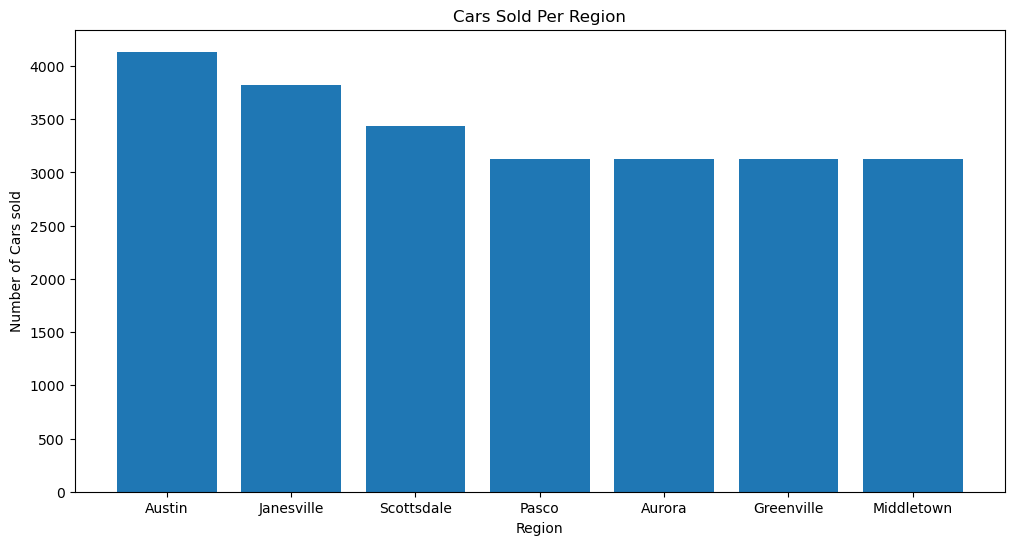

In [81]:
region_counts = df['Dealer_Region'].value_counts()
plt.figure(figsize=(12,6))
plt.xlabel('Region')
plt.ylabel('Number of Cars sold')
plt.title('Cars Sold Per Region')
plt.bar(region_counts.index,region_counts.values)


As we can observe, the greatest number of cars are sold in the city of Austin, followed by Janesville, then Scottsdale. The other cities have approximately the same number of cars sold. This tells us that Austin has the greatest demand for cars, which could be directly attributed to its large size of population. 

## Finding Correlations
We can look into the correlations between different attributes of our datasets.

In [77]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year 
df.columns = df.columns.str.strip()
df_dropped = df.drop(columns=['Car_id','Customer Name','Phone','Dealer_No','Date'])
df_dummies = pd.get_dummies(df_dropped)
df_dummies.corr()

,Annual Income,Price ($),Year,Gender_Female,Gender_Male,Dealer_Name_Buddy Storbeck's Diesel Service Inc,Dealer_Name_C & M Motors Inc,Dealer_Name_Capitol KIA,Dealer_Name_Chrysler Plymouth,Dealer_Name_Chrysler of Tri-Cities,...,Body Style_Passenger,Body Style_SUV,Body Style_Sedan,Dealer_Region_Aurora,Dealer_Region_Austin,Dealer_Region_Greenville,Dealer_Region_Janesville,Dealer_Region_Middletown,Dealer_Region_Pasco,Dealer_Region_Scottsdale
Annual Income,1.000000,0.012065,-0.031406,-0.054204,0.054204,0.003101,-0.000663,0.001917,-0.002759,0.004099,...,-0.006474,-0.006258,-0.001096,0.007909,-0.005076,0.000985,0.001863,-0.002828,0.012474,-0.014308
Price ($),0.012065,1.000000,-0.007511,0.006592,-0.006592,-0.009688,0.000238,0.001105,-0.005924,0.000364,...,0.025606,-0.053925,0.056649,0.006414,0.007773,0.002376,-0.007577,-0.006137,0.000756,-0.003746
Year,-0.031406,-0.007511,1.000000,0.029059,-0.029059,-0.006744,-0.002477,-0.001769,0.000688,0.001449,...,-0.000079,0.036593,-0.003138,-0.001810,0.000502,0.001211,-0.001507,-0.003281,0.003041,0.001840
Gender_Female,-0.054204,0.006592,0.029059,1.000000,-1.000000,-0.010199,-0.000348,0.003710,0.011164,0.001433,...,0.011016,-0.006216,-0.003646,-0.003869,0.007143,-0.002227,-0.003184,0.012601,-0.009983,-0.001027
Gender_Male,0.054204,-0.006592,-0.029059,-1.000000,1.000000,0.010199,0.000348,-0.003710,-0.011164,-0.001433,...,-0.011016,0.006216,0.003646,0.003869,-0.007143,0.002227,0.003184,-0.012601,0.009983,0.001027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dealer_Region_Greenville,0.000985,0.002376,0.001211,-0.002227,0.002227,-0.052811,-0.054244,0.325605,-0.044138,-0.050420,...,-0.000062,0.012339,-0.012781,-0.150599,-0.177441,1.000000,-0.169233,-0.150544,-0.150627,-0.158883
Dealer_Region_Janesville,0.001863,-0.007577,-0.001507,-0.003184,0.003184,-0.052297,-0.052149,-0.056652,0.288375,-0.060801,...,-0.008779,-0.009237,0.008379,-0.169295,-0.199469,-0.169233,1.000000,-0.169233,-0.169326,-0.178607
Dealer_Region_Middletown,-0.002828,-0.006137,-0.003281,0.012601,-0.012601,0.323631,-0.051135,-0.044340,-0.044138,-0.046536,...,0.000606,-0.007016,0.004372,-0.150599,-0.177441,-0.150544,-0.169233,1.000000,-0.150627,-0.158883
Dealer_Region_Pasco,0.012474,0.000756,0.003041,-0.009983,0.009983,-0.043540,-0.053506,-0.054461,-0.051175,0.324567,...,0.000774,-0.003031,0.002921,-0.150682,-0.177539,-0.150627,-0.169326,-0.150627,1.000000,-0.158971


The problem with our current dataset is that it relies highly on string (text) values and less numerical values. Hence when we try to apply correlations, it  produced a huge number of rows and columns, which would prove it hard to find an actual correlation. 

## Average Car Price In Each Region
It can prove to be useful to look into the mean car price region wise.

<BarContainer object of 7 artists>

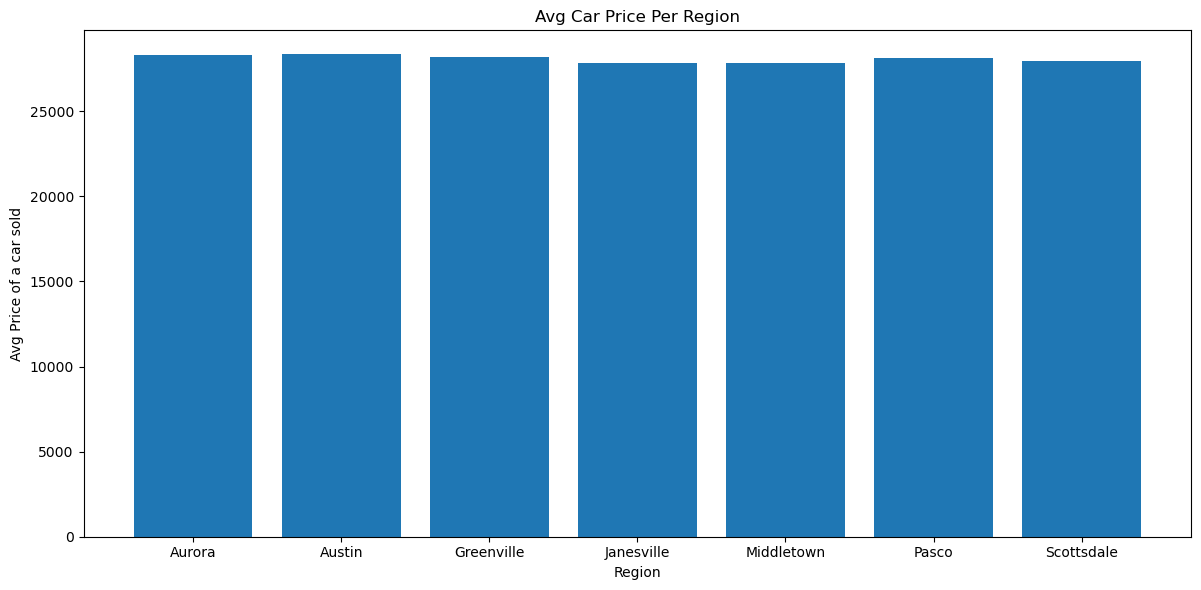

In [82]:
df_grouped = df.groupby('Dealer_Region')['Price ($)'].mean()
plt.figure(figsize=(12,6))
plt.xlabel('Region')
plt.ylabel('Avg Price of a car sold')
plt.title('Avg Car Price Per Region')
plt.tight_layout()
plt.bar(df_grouped.index,df_grouped.values)

It's evident that all the regions share more or less the similar average car price with very little differences.

## Annual Income and Price Per Car


Text(0.5, 1.0, 'Annual Income vs Price')

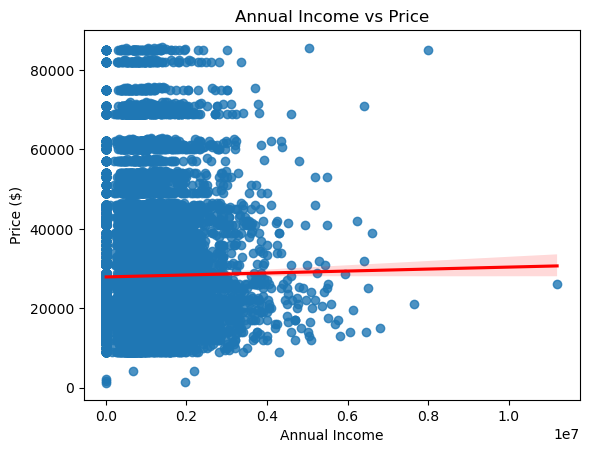

In [91]:
sns.regplot(x='Annual Income', y ='Price ($)', data = df,line_kws={"color": "red"})
plt.title('Annual Income vs Price')

Naturally, one would think that greater the annual income, greater the price of the car the customer would buy. But the regression plot here shows that there is not much of a correlation between these two when it comes to these cities, which is an interesting find.

## Average Car Price Over Time
We can look into the price fluctuations in the time period given in our dataset to see the situation the car market in different months. 

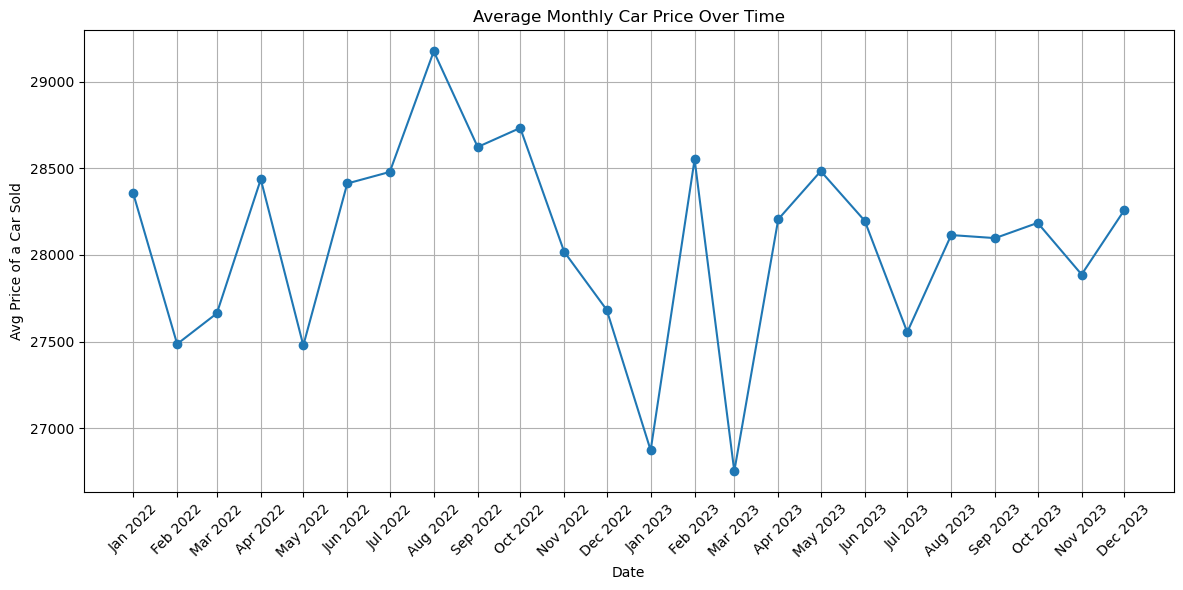

In [80]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month 
df_grouped = df.groupby(['Year','Month'])['Price ($)'].mean().reset_index()
df_grouped['Year-Month'] = pd.to_datetime(df_grouped['Year'].astype(str) + '-' + df_grouped['Month'].astype(str))

plt.figure(figsize=(12,6))
plt.xlabel('Date')
plt.ylabel('Avg Price of a Car Sold')
plt.xticks(
    ticks=df_grouped['Year-Month'],
    labels=df_grouped['Year-Month'].dt.strftime('%b %Y'),
    rotation=45
)
plt.title('Average Car Price Over Time')
plt.grid(True)
plt.tight_layout()

plt.plot(df_grouped['Year-Month'], df_grouped['Price ($)'], marker='o')

We can see that for most months, the price simply fluctuates between 28500 and 27500 back and forth. However there are some interesting points here. The greatest spike in price for an average car was seen in August 2022, which implies great inflation in the car market. In Jan 2023 and Mar 2023, the troughs of this graph is seen, which shows that the car prices were the lowest in these periods. It is also interesting to note that the price of the average car at the beginning of 2022 and end of 2023 are almost equal, the price in Dec 2023 being actually a little lower as compared to Jan 2022.